# CSE 256: NLP UCSD PA1:




## Text Classification with Logistic Regression and FF Networks(100points).

 The  goal of this assignment is  to get experience developing text classifiers with with linear models and simple feedforward
neural networks.  You will see the standard
pipeline used in many NLP tasks (reading in data, preprocessing, training, and testing).

*  Part 1: PyTorch Basics (25 points)
*  Part 2: Logistic Regression and Feedforward Neural Networks (60 points)
*  Part 3: Exploration (20 points)

Data. You will using a dataset of movie review snippets taken from IMDB.

### <font color='blue'> Due:  April 22, 2024 at  10pm </font>

###### IMPORTANT: After copying this notebook to your Google Drive, paste a link to it below. To get a publicly-accessible link, click the *Share* button at the top right, then click "Get shareable link" and copy the link.
#### <font color="red">Link: paste your link here:  </font> https://drive.google.com/file/d/1NW9tsO1OMvtdZACRgKyfKojso8rIqDDK/view?usp=sharing

---
**Notes:**

Make sure to save the notebook as you go along.

Submission instructions are located at the bottom of the notebook.

The code should run fairly quickly (a couple of minutes at most even without a GPU), if it takes much longer than that, its likely that you have introduced an error.

## Mount your Google Drive to Colab

**Note**: <font color="red"> TODO: you need to specify your working foldername in this cell below:

In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cse256/assignments/PA1/'
FOLDERNAME = None
FOLDERNAME = 'CSE256_PA1'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# This is later used to use the IMDB reviews
%cd /content/drive/My\ Drive/$FOLDERNAME/

# Part 1: PyTorch Basics (25 Points)

We will use PyTorch, a machine learning framework, for the programming assignmets in this course. The first part of this assigment focuses on  PyTorch and how it is used for NLP.
If you are new to [PyTorch](https://pytorch.org), it is highly recommended to go to work through  [the 60 minute tutorial](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)

## Question 1.1 (2.5 points)

In state-of-the-art NLP, words are represented by low-dimensional vectors,  referred to as *embeddings*. When processing sequences such as sentences, movie, reviews, or entire paragraphs,   word embeddings are used to compute a vector representation of the sequence,  denoted by $\boldsymbol{x}$. In the cell below, the embeddings for the words in the sequence "Alice talked to" are provided. Your task is to combine these embeddings into a single vector representation $\boldsymbol{x}$, using  [element-wise vector addition](https://ml-cheatsheet.readthedocs.io/en/latest/linear_algebra.html#elementwise-operations). This method is a simple way to obtain a sequence representation, namely, it is a *continuous bag-of-words (BoW) representation* of a sequence.

In [1]:
import torch
torch.set_printoptions(sci_mode=False)
# Seed the random number generator for reproducibility
torch.manual_seed(0)

input_sequence = 'I like NLP'

# Initialize an embedding matrix
# We have a vocabulary of 5 words, each represented by a 10-dimensional embedding vector.
embeddings = torch.nn.Embedding(num_embeddings=5, embedding_dim=10)
vocab = {'I': 0, 'like': 1, 'NLP': 2, 'classifiers': 3, '.': 4}

# Convert the word to integer indices. These indices will be used to
# retrieve the corresponding embeddings from the embedding matrix.
# In PyTorch, operations are performed on Tensor objects, so we need to  convert
# the list of indices to a LongTensor.
indices = torch.LongTensor([vocab[w] for w in input_sequence.split()])
input_sequence_embs = embeddings(indices)
print('sequence embedding tensor size: ', input_sequence_embs.size())

# The input_sequence_embs tensor contains the embeddings for each word in the input sequence.
# The next step is to aggregate these embeddings into a single vector representation.
# You will use  element-wise addition to do this.
# Write the code to add the embeddings element-wise and store the result in the variable "x".

print(input_sequence_embs)
### YOUR CODE HERE!
# Replace with the actual computation
x = torch.sum(input_sequence_embs, dim=0)

### DO NOT MODIFY THE LINE BELOW
print('input sequence embedding sum (continuous BoW): ', x)


sequence embedding tensor size:  torch.Size([3, 10])
tensor([[-1.1258, -1.1524, -0.2506, -0.4339,  0.8487,  0.6920, -0.3160, -2.1152,
          0.3223, -1.2633],
        [ 0.3500,  0.3081,  0.1198,  1.2377,  1.1168, -0.2473, -1.3527, -1.6959,
          0.5667,  0.7935],
        [ 0.5988, -1.5551, -0.3414,  1.8530,  0.7502, -0.5855, -0.1734,  0.1835,
          1.3894,  1.5863]], grad_fn=<EmbeddingBackward0>)
input sequence embedding sum (continuous BoW):  tensor([-0.1770, -2.3993, -0.4721,  2.6568,  2.7157, -0.1408, -1.8421, -3.6277,
         2.2783,  1.1165], grad_fn=<SumBackward1>)


## Question 1.2 (2.5 points)
Element-wise addition is not the best way to aggregate individual word embeddings in a sequence into a single vector representation (a process known as *composition*). State one significant limitation of using element-wise addition as a composition function for word embeddings?
---

#### <font color="red"> One significant limitation of using element-wise addition as a composition function for word embddings is that it does not take the context of the text into consideration. The positioning of words in a sentence result in different contexts, and simply adding up the embeddings ignores the semantics of the sentence. This loss of contextual information can severly affect the performance of downstream tasks, such as sentiment analysis, topic classification, etc., where these element-wise added embeddings are used. </font>


## Question 1.3 (5 points)
The [softmax function](https://pytorch.org/docs/master/nn.functional.html#softmax) is used in nearly all the neural network architectures we will look at in this course. The softmax is computed on an $n$-dimensional vector $<x_1, x_2, \dots, x_n>$ as $\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{1 \leq j \leq n} e^{x_j}}$. Given the   sequence representation $\boldsymbol{x}$ we just computed, we can use the softmax function in combination with a linear projection using a matrix $W$ to transform $\boldsymbol{x}$ into a probability distribution $p$ over the next word, expressed as $p = \text{softmax}(W\boldsymbol{x})$. Let's look at this in the cell below:

In [2]:
# Initialize a random matrix W of size 10x5. This will serve as the weight matrix
# for the linear projection of the vector x into a 5-dimensional space.
W = torch.rand(10, 5)


# Project the vector x to a 5-dimensional space using the matrix W. This projection is achieved through
# matrix multiplication. After the projection, apply the softmax function to the result,
# which converts the 5-dimensional projected vector into a probability distribution.
# You can find the softmax function in PyTorch's  API (torch.nn.functional.softmax).
# Store the resulting probability distribution in the variable "probs".

### YOUR CODE HERE
# Replace with the actual computation
x_ = x.view(1,-1)
projection = torch.matmul(x_,W)
probs = torch.nn.functional.softmax(projection, dim=1)


### DO NOT MODIFY THE BELOW LINE!
print('probability distribution', probs)


probability distribution tensor([[0.0718, 0.0998, 0.1331, 0.6762, 0.0191]], grad_fn=<SoftmaxBackward0>)


## Question 1.4 (5 points)

In the example so far, we focused on a single sequence ("I like NLP"). However, in practical applications, it’s common to process multiple sequences simultaneously. This practice, known as *batching*, allows for more efficient use of GPU parallelism. In batching, each sequence is considered an example within a larger batch

For this question, you will perform redo the previous computation, but with a batch of two sequences instead of just one. The final output of this cell should be a 2x5 matrix, where each row represents a probability distribution for a sequence. **Important: Avoid using loops in your solution, as you will lose points**. The code should be fully vectorized.

In [3]:
import torch
import torch.nn.functional as F

# For this example, we replicate our previous sequence indices to create a simple batch.
# Normally, each example in the batch would be different.
batch_indices = torch.cat(2 * [indices]).reshape((2, 3))
batch_embs = embeddings(batch_indices)
print('Batch embedding tensor size: ', batch_embs.size())

# To process the batch, follow these steps:
# Step 1: Aggregate the embeddings for each example in the batch into a single representation.
# This is done through element-wise addition. Use torch.sum with the appropriate 'dim' argument
# to sum across the sequence length (not the batch dimension).

# Step 2: Project each aggregated representation into a 5-dimensional space using the matrix W.
# This involves matrix multiplication, ensuring the resulting batch has the shape 2x5.

# Step 3: Apply the softmax function to the projected representations to obtain probability distributions.
# Each row in the output matrix should sum to 1, representing a probability distribution for each batch example.

### YOUR CODE HERE
# Replace with the actual computation
agg_batch_embs = torch.sum(batch_embs, dim=1)
projections = torch.matmul(agg_batch_embs, W)
batch_probs = F.softmax(projections, dim=1)

### DO NOT MODIFY THE BELOW LINE
print("Batch probability distributions:", batch_probs)


Batch embedding tensor size:  torch.Size([2, 3, 10])
Batch probability distributions: tensor([[0.0718, 0.0998, 0.1331, 0.6762, 0.0191],
        [0.0718, 0.0998, 0.1331, 0.6762, 0.0191]], grad_fn=<SoftmaxBackward0>)



## Question 1.5 (5 points)

When processing a text sequence, how should the system handle words that are not present in the existing vocabulary? In the current implementation, the presence of such out-of-vocabulary words causes the code to fail, as in the cell below. To address this issue,  a simple solution is to use the special token `<UNK>`,  added to the vocabulary to serve as a placeholder for any unknown words.

Modify the indexing function to ensure that it checks each word against the known vocabulary and substitutes any out-of-vocabulary words with the `<UNK>` token.  Make sure not to add  any new words  to the vocabulary  except for the `<UNK>` token. Don't forget to adjust the embedding table.


In [4]:
import torch

torch.set_printoptions(sci_mode=False)
# Seed the random number generator for reproducibility
torch.manual_seed(0)

input_sequence = 'I like linear'


# Initialize an embedding matrix
# We have a vocabulary of 5 words, each represented by a 10-dimensional embedding vector.
embeddings = torch.nn.Embedding(num_embeddings=6, embedding_dim=10) # num_embeddings changed from 5 to 6
vocab = {'I': 0, 'like': 1, 'NLP': 2, 'classifiers': 3, '.': 4, '<UNK>': 5}

indices = torch.LongTensor([vocab.get(w, vocab['<UNK>']) for w in input_sequence.split()]) ### MODIFY THIS INDEXING
input_sequence_embs = embeddings(indices)
print('sequence embedding tensor size: ', input_sequence_embs.size())



sequence embedding tensor size:  torch.Size([3, 10])


-------------------------------

# Part 2: Logisitic Regression and Feedforward Neural Networks (60 points)

In this part, you are going to experiment with Logistic Regression and Feedforward Neural Networks.  Run the starter code to train a two-layer fully connected neural network on the IMDB Sentiment Classification Dataset. The code provided below generates two plots that display the train accuracy and test accuracy. You will  build on code to produce different variants.


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import time
import scipy.stats
import copy
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.feature_extraction.text import CountVectorizer

########## Neural network class
#
# Network of two fully connected layers
# with ReLU activation function and Softmax output
###########################################

class NN2(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # First fully connected layer.
        self.fc2 = nn.Linear(hidden_size, 2)  # Second fully connected layer, outputting two classes.

    # Define the forward pass of the neural network.
    # x: The input tensor.
    def forward(self, x):
        x = F.relu(self.fc1(x))  # Apply ReLU activation function after the first layer.
        x = self.fc2(x)  # Pass the result to the second layer.
        x = F.softmax(x, dim=1)  # Apply Softmax to obtain output probabilities.
        return x


In [6]:
######### ReviewsDataset class
#
# create a dataset to be used for training and evaluation
#########################
# Function to read reviews from a directory
def read_reviews(directory, num_reviews=1000):
    reviews = []
    for filename in os.listdir(directory)[:num_reviews]:  # Limit the number of files read
        with open(os.path.join(directory, filename), 'r', encoding='utf-8') as file:
            reviews.append(file.read())
    return reviews


class ReviewsDataset(Dataset):
    def __init__(self, pos_dir, neg_dir, num_reviews=1000, vectorizer=None, train=True):
        self.reviews = read_reviews(pos_dir, num_reviews) + read_reviews(neg_dir, num_reviews)
        self.labels = [1] * min(num_reviews, len(os.listdir(pos_dir))) + [0] * min(num_reviews, len(os.listdir(neg_dir)))
        if train or vectorizer is None:
            self.vectorizer = CountVectorizer(max_features=512)  # Adjust as needed
            self.embeddings = self.vectorizer.fit_transform(self.reviews).toarray()
        else:
            self.vectorizer = vectorizer
            self.embeddings = self.vectorizer.transform(self.reviews).toarray()

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, idx):
        return self.embeddings[idx], self.labels[idx]


In [7]:
########## train_epoch
#
# function that trains for one epoch (one pass through the training set)
######################

def train_epoch(data_loader, model, loss_fn, optimizer):
    size = len(data_loader.dataset)
    num_batches = len(data_loader)
    model.train()
    train_loss, correct = 0, 0
    for batch, (X, y) in enumerate(data_loader):
        X = X.float()
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        train_loss += loss.item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    average_train_loss = train_loss / num_batches
    accuracy = correct / size
    return accuracy, average_train_loss


########## eval_epoch
#
# function that evaluates a model with a test set
######################
def eval_epoch(data_loader, model, loss_fn, optimizer):
    size = len(data_loader.dataset)
    num_batches = len(data_loader)
    model.eval()
    eval_loss = 0
    correct = 0
    for batch, (X, y) in enumerate(data_loader):
        # Compute prediction error
        X = X.float()
        pred = model(X)
        loss = loss_fn(pred, y)
        eval_loss += loss.item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    average_eval_loss = eval_loss / num_batches
    accuracy = correct / size
    return accuracy, average_eval_loss



########## experiment
#
# function that trains a neural network with a training set
# and evaluates the neural network with a test set
#####################
def experiment(model, use_cross_entropy=False, learning_rate=0.0001, enable_early_stopping=False, patience=5):
    best_test_accuracy = 0.0
    counter = 0
    
    # negative log likelihood loss function
    loss_fn = nn.CrossEntropyLoss() if use_cross_entropy else nn.NLLLoss()
    
    # Adam optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    average_train_loss = []
    all_train_accuracy = []
    average_test_loss = []
    all_test_accuracy = []
    for epoch in range(150):
        train_accuracy, train_loss = train_epoch(train_loader, model, loss_fn, optimizer)
        all_train_accuracy += [train_accuracy]
        test_accuracy, test_loss = eval_epoch(test_loader, model, loss_fn, optimizer)
        all_test_accuracy += [test_accuracy]
        if enable_early_stopping:
            if test_accuracy > best_test_accuracy:
                best_test_accuracy = test_accuracy
                counter = 0
                # Save the model if test accuracy improves
                torch.save(model.state_dict(), 'best_model.pt')
            else:
                counter += 1
                if counter >= patience:
                    print(f'Early stopping after {patience} epochs without improvement.')
                    break
        
        if epoch % 10 == 9:
            print(f'Epoch #{epoch+1}: \t train accuracy {train_accuracy:.3f}\t train loss {train_loss:.3f}\t test accuracy {test_accuracy:.3f}\t test loss {test_loss:.3f}')
    
    return all_train_accuracy, all_test_accuracy


In [8]:
######################
#
# 1) Load data splits: the train and test sets
# 2) Train neural networks
# 3) Plot the results
############################

start_time = time.time()

# Load the dataset
#root_dir = '/content/drive/My Drive/{}/CSE256_PA1/aclImdb/train'.format(FOLDERNAME)
#root_dir_test = '/content/drive/My Drive/{}/CSE256_PA1/aclImdb/test'.format(FOLDERNAME)
root_dir = './CSE256_PA1/aclImdb/train'
root_dir_test = './CSE256_PA1/aclImdb/test'
train_dataset = ReviewsDataset(root_dir+'/pos', root_dir+'/neg', train=True)
test_dataset = ReviewsDataset(root_dir_test+'/pos', root_dir_test+'/neg', vectorizer=train_dataset.vectorizer, train=False)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Time to load data: {elapsed_time} seconds")



Time to load data: 0.5358321666717529 seconds



2 layers:


/Users/chinmaysharma/Documents/Jupyter/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Epoch #10: 	 train accuracy 0.866	 train loss -0.806	 test accuracy 0.802	 test loss -0.755
Epoch #20: 	 train accuracy 0.911	 train loss -0.872	 test accuracy 0.803	 test loss -0.783
Epoch #30: 	 train accuracy 0.933	 train loss -0.904	 test accuracy 0.800	 test loss -0.787
Epoch #40: 	 train accuracy 0.945	 train loss -0.925	 test accuracy 0.796	 test loss -0.788
Epoch #50: 	 train accuracy 0.952	 train loss -0.938	 test accuracy 0.790	 test loss -0.788
Epoch #60: 	 train accuracy 0.958	 train loss -0.948	 test accuracy 0.785	 test loss -0.788
Epoch #70: 	 train accuracy 0.960	 train loss -0.954	 test accuracy 0.794	 test loss -0.790
Epoch #80: 	 train accuracy 0.961	 train loss -0.957	 test accuracy 0.792	 test loss -0.791
Epoch #90: 	 train accuracy 0.962	 train loss -0.960	 test accuracy 0.793	 test loss -0.791
Epoch #100: 	 train accuracy 0.963	 train loss -0.961	 test accuracy 0.795	 test loss -0.791
Epoch #110: 	 train accuracy 0.963	 train loss -0.962	 test accuracy 0.795	 tes

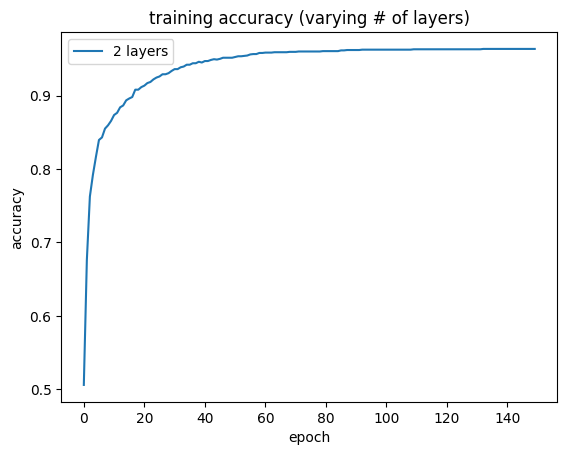

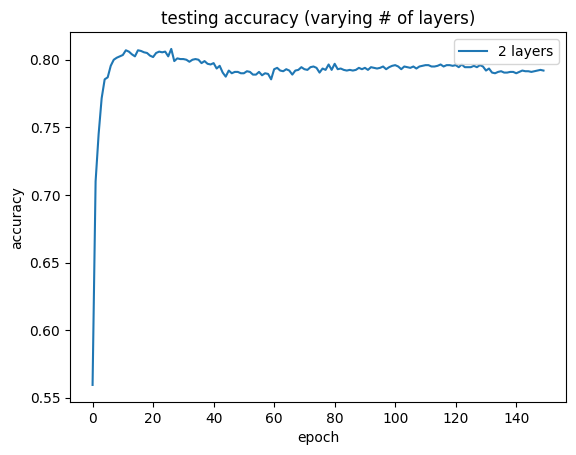

Time to train, eval model: 10.604265928268433 seconds


In [9]:
start_time = time.time()

# train neural networks
print('\n2 layers:')
nn2_train_accuracy, nn2_test_accuracy = experiment(NN2(input_size=512, hidden_size=100))

# plot training accuracy
plt.plot(nn2_train_accuracy)
plt.title('training accuracy (varying # of layers)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['2 layers'])
plt.show()

# plot testing accuracy
plt.plot(nn2_test_accuracy)
plt.title('testing accuracy (varying # of layers)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['2 layers'])
plt.show()


end_time = time.time()
elapsed_time = end_time - start_time

print(f"Time to train, eval model: {elapsed_time} seconds")

### <font color="red">  TO DO: Impelementation

- Implement and test fully connected networks with 1,2,3, and 4 layers. The starter code above already provides you with an implementation of 2 layers. Each hidden layer should have 100 nodes.
-  On the four layer network, modify the code to replace the ReLU activation function with the sigmoid activation function.
- On the four layer network, modify your code to insert a dropout layer with probability 0.5 after each hidden leayer. Tip: see the function nn.dropout().


In [10]:
### YOUR CODE HERE

In [11]:
### 1 layer
class NN1(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 2)

    # Define the forward pass of the neural network.
    # x: The input tensor.
    def forward(self, x):
        x = self.fc1(x)
        x = F.softmax(x, dim=1)  # Apply Softmax to obtain output probabilities.
        return x

start_time = time.time()

# train neural networks
print('\n1 layers:')
nn1_train_accuracy, nn1_test_accuracy = experiment(NN1(input_size=512))

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Time to train, eval model: {elapsed_time} seconds")


1 layers:
Epoch #10: 	 train accuracy 0.778	 train loss -0.652	 test accuracy 0.764	 test loss -0.637
Epoch #20: 	 train accuracy 0.822	 train loss -0.712	 test accuracy 0.791	 test loss -0.685
Epoch #30: 	 train accuracy 0.843	 train loss -0.747	 test accuracy 0.797	 test loss -0.711
Epoch #40: 	 train accuracy 0.855	 train loss -0.771	 test accuracy 0.797	 test loss -0.728
Epoch #50: 	 train accuracy 0.864	 train loss -0.788	 test accuracy 0.800	 test loss -0.740
Epoch #60: 	 train accuracy 0.872	 train loss -0.802	 test accuracy 0.808	 test loss -0.749
Epoch #70: 	 train accuracy 0.878	 train loss -0.813	 test accuracy 0.809	 test loss -0.756
Epoch #80: 	 train accuracy 0.883	 train loss -0.822	 test accuracy 0.806	 test loss -0.761
Epoch #90: 	 train accuracy 0.890	 train loss -0.830	 test accuracy 0.808	 test loss -0.765
Epoch #100: 	 train accuracy 0.891	 train loss -0.836	 test accuracy 0.807	 test loss -0.768
Epoch #110: 	 train accuracy 0.894	 train loss -0.842	 test accuracy

In [12]:
### 2 layers
start_time = time.time()

# train neural networks
print('\n2 layers:')
nn2_train_accuracy, nn2_test_accuracy = experiment(NN2(input_size=512, hidden_size=100))
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Time to train, eval model: {elapsed_time} seconds")


2 layers:
Epoch #10: 	 train accuracy 0.863	 train loss -0.806	 test accuracy 0.801	 test loss -0.757
Epoch #20: 	 train accuracy 0.904	 train loss -0.869	 test accuracy 0.807	 test loss -0.783
Epoch #30: 	 train accuracy 0.927	 train loss -0.899	 test accuracy 0.803	 test loss -0.787
Epoch #40: 	 train accuracy 0.943	 train loss -0.919	 test accuracy 0.793	 test loss -0.786
Epoch #50: 	 train accuracy 0.950	 train loss -0.933	 test accuracy 0.794	 test loss -0.785
Epoch #60: 	 train accuracy 0.956	 train loss -0.944	 test accuracy 0.790	 test loss -0.784
Epoch #70: 	 train accuracy 0.959	 train loss -0.951	 test accuracy 0.786	 test loss -0.783
Epoch #80: 	 train accuracy 0.961	 train loss -0.956	 test accuracy 0.789	 test loss -0.784
Epoch #90: 	 train accuracy 0.962	 train loss -0.959	 test accuracy 0.791	 test loss -0.785
Epoch #100: 	 train accuracy 0.963	 train loss -0.961	 test accuracy 0.789	 test loss -0.786
Epoch #110: 	 train accuracy 0.965	 train loss -0.963	 test accuracy

In [13]:
### 3 layers
class NN3(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 2)

    # Define the forward pass of the neural network.
    # x: The input tensor.
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        return x


start_time = time.time()

# train neural networks
print('\n3 layers:')
nn3_train_accuracy, nn3_test_accuracy = experiment(NN3(input_size=512, hidden_size=100))
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Time to train, eval model: {elapsed_time} seconds")


3 layers:
Epoch #10: 	 train accuracy 0.898	 train loss -0.867	 test accuracy 0.799	 test loss -0.787
Epoch #20: 	 train accuracy 0.944	 train loss -0.931	 test accuracy 0.793	 test loss -0.790
Epoch #30: 	 train accuracy 0.959	 train loss -0.954	 test accuracy 0.791	 test loss -0.788
Epoch #40: 	 train accuracy 0.962	 train loss -0.961	 test accuracy 0.786	 test loss -0.786
Epoch #50: 	 train accuracy 0.965	 train loss -0.964	 test accuracy 0.785	 test loss -0.783
Epoch #60: 	 train accuracy 0.965	 train loss -0.964	 test accuracy 0.782	 test loss -0.785
Epoch #70: 	 train accuracy 0.966	 train loss -0.965	 test accuracy 0.783	 test loss -0.785
Epoch #80: 	 train accuracy 0.966	 train loss -0.966	 test accuracy 0.785	 test loss -0.789
Epoch #90: 	 train accuracy 0.966	 train loss -0.966	 test accuracy 0.785	 test loss -0.789
Epoch #100: 	 train accuracy 0.966	 train loss -0.966	 test accuracy 0.785	 test loss -0.788
Epoch #110: 	 train accuracy 0.967	 train loss -0.967	 test accuracy

In [14]:
### 4 layers
class NN4(nn.Module):
    def __init__(self, input_size, hidden_size, activation_function='relu', dropout_prob=0):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, 2)
        self.activation = nn.ReLU() if activation_function == 'relu' else nn.Sigmoid()
        self.dropout1 = nn.Dropout(p=dropout_prob)
        self.dropout2 = nn.Dropout(p=dropout_prob)
        self.dropout3 = nn.Dropout(p=dropout_prob)

    # Define the forward pass of the neural network.
    # x: The input tensor.
    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.dropout1(x)
        x = self.activation(self.fc2(x))
        x = self.dropout2(x)
        x = self.activation(self.fc3(x))
        x = self.dropout3(x)
        x = self.fc4(x)
        x = F.softmax(x, dim=1)
        return x


In [15]:
# 4 layers with ReLU activation and without dropout
start_time = time.time()

# train neural networks
print('\n4 layers:')
nn4_train_accuracy, nn4_test_accuracy = experiment(NN4(input_size=512, hidden_size=100))
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Time to train, eval model: {elapsed_time} seconds")


4 layers:
Epoch #10: 	 train accuracy 0.916	 train loss -0.899	 test accuracy 0.799	 test loss -0.794
Epoch #20: 	 train accuracy 0.952	 train loss -0.949	 test accuracy 0.803	 test loss -0.798
Epoch #30: 	 train accuracy 0.959	 train loss -0.958	 test accuracy 0.797	 test loss -0.796
Epoch #40: 	 train accuracy 0.960	 train loss -0.959	 test accuracy 0.797	 test loss -0.795
Epoch #50: 	 train accuracy 0.962	 train loss -0.961	 test accuracy 0.801	 test loss -0.798
Epoch #60: 	 train accuracy 0.963	 train loss -0.963	 test accuracy 0.798	 test loss -0.798
Epoch #70: 	 train accuracy 0.963	 train loss -0.963	 test accuracy 0.797	 test loss -0.798
Epoch #80: 	 train accuracy 0.964	 train loss -0.963	 test accuracy 0.799	 test loss -0.798
Epoch #90: 	 train accuracy 0.964	 train loss -0.964	 test accuracy 0.794	 test loss -0.794
Epoch #100: 	 train accuracy 0.964	 train loss -0.964	 test accuracy 0.796	 test loss -0.794
Epoch #110: 	 train accuracy 0.964	 train loss -0.964	 test accuracy

In [16]:
### 4 layers with sigmoid activation and dropout
start_time = time.time()

# train neural networks
print('\n4 layers with sigmoid activation and dropout:')
nn4_train_accuracy_sigmoid_dropout, nn4_test_accuracy_sigmoid_dropout = experiment(NN4(input_size=512, hidden_size=100, activation_function='sigmoid', dropout_prob=0.5))
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Time to train, eval model: {elapsed_time} seconds")


4 layers with sigmoid activation and dropout:
Epoch #10: 	 train accuracy 0.507	 train loss -0.502	 test accuracy 0.500	 test loss -0.505
Epoch #20: 	 train accuracy 0.760	 train loss -0.656	 test accuracy 0.788	 test loss -0.669
Epoch #30: 	 train accuracy 0.832	 train loss -0.804	 test accuracy 0.800	 test loss -0.782
Epoch #40: 	 train accuracy 0.859	 train loss -0.843	 test accuracy 0.807	 test loss -0.797
Epoch #50: 	 train accuracy 0.866	 train loss -0.858	 test accuracy 0.808	 test loss -0.803
Epoch #60: 	 train accuracy 0.877	 train loss -0.867	 test accuracy 0.808	 test loss -0.804
Epoch #70: 	 train accuracy 0.880	 train loss -0.876	 test accuracy 0.807	 test loss -0.805
Epoch #80: 	 train accuracy 0.887	 train loss -0.880	 test accuracy 0.805	 test loss -0.805
Epoch #90: 	 train accuracy 0.893	 train loss -0.889	 test accuracy 0.807	 test loss -0.805
Epoch #100: 	 train accuracy 0.893	 train loss -0.891	 test accuracy 0.812	 test loss -0.806
Epoch #110: 	 train accuracy 0.8

## Question 2.1 Architecture Comparison (20 points)

Generate two plots where the y-axis is the accuracy and the x-axis is the # of epochs. The first plot should include 4 curves that show the training accuracy for 1, 2, 3, and 4 layers. The second plot should include 4 curves that show the testing accuracy for 1, 2, 3, and 4 layers. Use ReLU activation functions without any dropout and 100 nodes per hidden layer. Discuss the results.

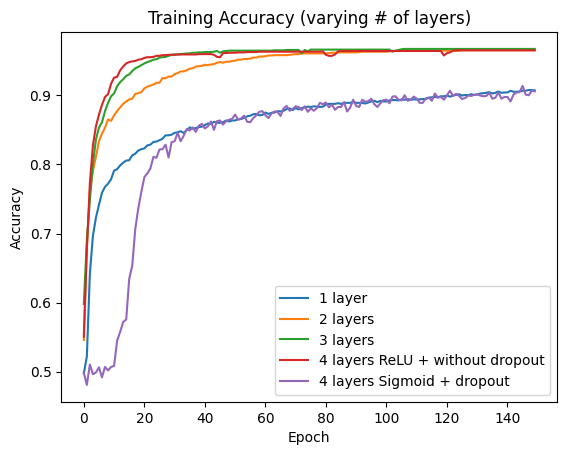

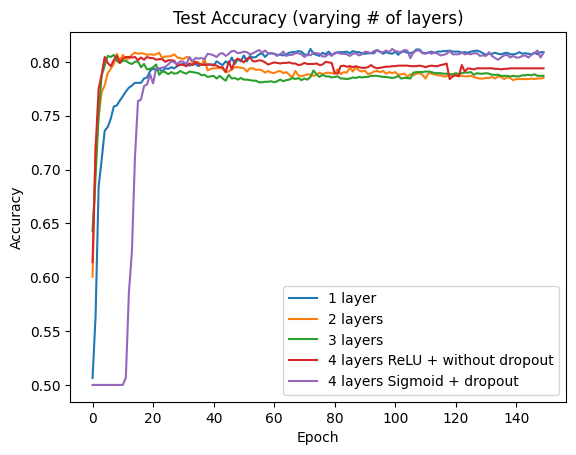

In [17]:
# plot training accuracy
plt.plot(nn1_train_accuracy, label='1 layer')
plt.plot(nn2_train_accuracy, label='2 layers')
plt.plot(nn3_train_accuracy, label='3 layers')
plt.plot(nn4_train_accuracy, label='4 layers ReLU + without dropout')
plt.plot(nn4_train_accuracy_sigmoid_dropout, label='4 layers Sigmoid + dropout')
plt.title('Training Accuracy (varying # of layers)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# plot testing accuracy
plt.plot(nn1_test_accuracy, label='1 layer')
plt.plot(nn2_test_accuracy, label='2 layers')
plt.plot(nn3_test_accuracy, label='3 layers')
plt.plot(nn4_test_accuracy, label='4 layers ReLU + without dropout')
plt.plot(nn4_test_accuracy_sigmoid_dropout, label='4 layers Sigmoid + dropout')
plt.title('Test Accuracy (varying # of layers)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#### <font color="red">Analysis and discussion here (< 5 sentences) :</font> 
We can observe that the training accuracy for all 4 models (with different number of layers) initially increases and then stabilizes with increasing epochs. The training accuracy for models with 2, 3 and 4 layers converges to similar values, while training accuracy was lower for model with just 1 layer. However, this trend is reversed in the test accuracy as the model with 1 layer achieves the highest test accuracy after 150 epochs. Whereas, the models with 2, 3 and 4 layers coverge to a lower test accuracy. This shows that although deeper models with 2,3 or 4 layers fit the training data well, they fail to generalize on the unseen test data, which indicates that the deeper models are overfitting on the training data.

However, we can observe that the training and testing accuracy of the 4 layers model with sigmoid activation and dropout layers is similar to the 1 layer model. The gap between the training and testing accuracy of the 4 layers model with sigmoid activation and dropout layers is less compared to the 4 layer model with relu activation and no dropout. This reduction in disparity between the training and testing accuracy of the 4 layers model with sigmoid activation and dropout layers can be attributed to the dropout layers with probability 0.5. This demonstrates the regularization capability of dropout layers which prevents models from overfitting on the training data.

## Question 2.2 Activation functions (20 points)

 Generate two plots where the y-axis is the accuracy and the x-axis is the # of epochs. The first plot should include 2 curves that show the training accuracy when using the ReLU versus sigmoid activation functions. The second plot should include 2 curves that show the testing accuracy when using the ReLU versus sigmoid activation functions. Use 2 layers and 100 nodes per hidden layer without any dropout. Discuss the results.

In [18]:
### 2 layers custom model
class NN2_custom(nn.Module):
    def __init__(self, input_size, hidden_size, activation_function='relu', dropout_prob=0):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 2)
        self.activation = nn.ReLU() if activation_function == 'relu' else nn.Sigmoid()
        self.dropout = nn.Dropout(p=dropout_prob)

    # Define the forward pass of the neural network.
    # x: The input tensor.
    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        x = F.softmax(x, dim=1)
        return x
        

In [19]:
### 2 layers with ReLU

start_time = time.time()

# train neural networks
print('\n2 layers with ReLU:')
nn2_train_accuracy_relu, nn2_test_accuracy_relu = experiment(NN2_custom(input_size=512, hidden_size=100, activation_function='relu'))
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Time to train, eval model: {elapsed_time} seconds")


2 layers with ReLU:
Epoch #10: 	 train accuracy 0.872	 train loss -0.809	 test accuracy 0.806	 test loss -0.758
Epoch #20: 	 train accuracy 0.909	 train loss -0.871	 test accuracy 0.805	 test loss -0.782
Epoch #30: 	 train accuracy 0.930	 train loss -0.902	 test accuracy 0.806	 test loss -0.788
Epoch #40: 	 train accuracy 0.946	 train loss -0.923	 test accuracy 0.799	 test loss -0.788
Epoch #50: 	 train accuracy 0.955	 train loss -0.938	 test accuracy 0.793	 test loss -0.787
Epoch #60: 	 train accuracy 0.957	 train loss -0.948	 test accuracy 0.791	 test loss -0.788
Epoch #70: 	 train accuracy 0.959	 train loss -0.953	 test accuracy 0.797	 test loss -0.790
Epoch #80: 	 train accuracy 0.961	 train loss -0.958	 test accuracy 0.797	 test loss -0.790
Epoch #90: 	 train accuracy 0.963	 train loss -0.960	 test accuracy 0.796	 test loss -0.788
Epoch #100: 	 train accuracy 0.964	 train loss -0.963	 test accuracy 0.797	 test loss -0.789
Epoch #110: 	 train accuracy 0.964	 train loss -0.963	 tes

In [20]:
### 2 layers with Sigmoid

start_time = time.time()

# train neural networks
print('\n2 layers with Sigmoid:')
nn2_train_accuracy_sigmoid, nn2_test_accuracy_sigmoid = experiment(NN2_custom(input_size=512, hidden_size=100, activation_function='sigmoid'))
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Time to train, eval model: {elapsed_time} seconds")


2 layers with Sigmoid:
Epoch #10: 	 train accuracy 0.820	 train loss -0.693	 test accuracy 0.786	 test loss -0.675
Epoch #20: 	 train accuracy 0.860	 train loss -0.795	 test accuracy 0.802	 test loss -0.750
Epoch #30: 	 train accuracy 0.882	 train loss -0.837	 test accuracy 0.808	 test loss -0.775
Epoch #40: 	 train accuracy 0.896	 train loss -0.862	 test accuracy 0.808	 test loss -0.784
Epoch #50: 	 train accuracy 0.910	 train loss -0.878	 test accuracy 0.808	 test loss -0.789
Epoch #60: 	 train accuracy 0.920	 train loss -0.890	 test accuracy 0.809	 test loss -0.791
Epoch #70: 	 train accuracy 0.925	 train loss -0.901	 test accuracy 0.802	 test loss -0.791
Epoch #80: 	 train accuracy 0.930	 train loss -0.909	 test accuracy 0.797	 test loss -0.790
Epoch #90: 	 train accuracy 0.935	 train loss -0.917	 test accuracy 0.792	 test loss -0.789
Epoch #100: 	 train accuracy 0.941	 train loss -0.923	 test accuracy 0.789	 test loss -0.786
Epoch #110: 	 train accuracy 0.942	 train loss -0.927	 

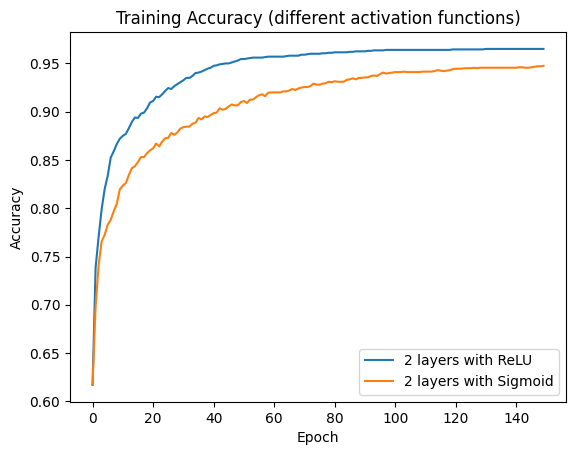

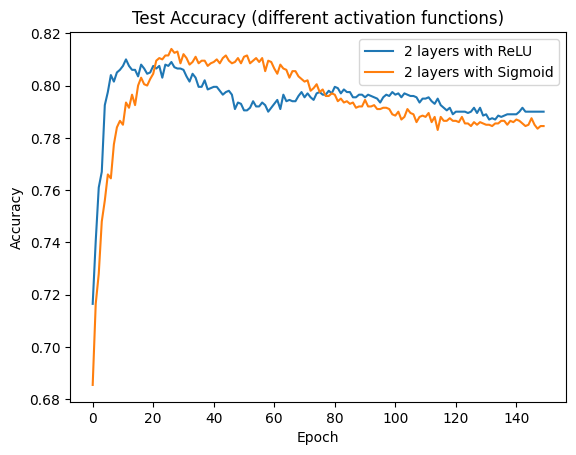

In [21]:
# plot training accuracy
plt.plot(nn2_train_accuracy_relu, label='2 layers with ReLU')
plt.plot(nn2_train_accuracy_sigmoid, label='2 layers with Sigmoid')
plt.title('Training Accuracy (different activation functions)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# plot testing accuracy
plt.plot(nn2_test_accuracy_relu, label='2 layers with ReLU')
plt.plot(nn2_test_accuracy_sigmoid, label='2 layers with Sigmoid')
plt.title('Test Accuracy (different activation functions)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#### <font color="red">Analysis and discussion here (< 5 sentences) :</font> 
The training accuracy for both models nearly stabilize around the 150 epoch mark. The 2 layer model with ReLU activation achieves a higher training accuracy compared to the 2 layer model with sigmoid activation. On the other hand, the testing accuracy of both the models had significant variablility but at later epochs the 2 layer model with ReLU activation had higher test accuracy than the 2 layer model with sigmoid activation. This shows that the 2 layer model with ReLU activation fits the training data well and with enough training epochs reduces overfitting on the training data. This is understandable as ReLU does sparse activation and mitigates the vanishing gradient problem, which aids the model's ability to generalize. Whereas, the 2 layer model with sigmoid activation tends to overfit on the training data at later epochs. 

## Question 2.3 Dropout comparison (15 points)

Generate two plots where the y-axis is the accuracy and the x-axis is the # of epochs. The first plot should include 2 curves that show the training accuracy with and without dropout (with probability 0.5) after each hidden layer. The second plot should include 2 curves that show the testing accuracy with and without dropout (with probability 0.5) after each hidden layer. Use 4 layers and 36 nodes per hidden layer with ReLU activation functions. Discuss the results.

In [22]:
### 4 layers without dropout
start_time = time.time()

# train neural networks
print('\n4 layers without dropout:')
nn4_train_accuracy_no_dropout, nn4_test_accuracy_no_dropout = experiment(NN4(input_size=512, hidden_size=36))
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Time to train, eval model: {elapsed_time} seconds")


4 layers without dropout:
Epoch #10: 	 train accuracy 0.873	 train loss -0.843	 test accuracy 0.808	 test loss -0.782
Epoch #20: 	 train accuracy 0.930	 train loss -0.914	 test accuracy 0.807	 test loss -0.796
Epoch #30: 	 train accuracy 0.945	 train loss -0.939	 test accuracy 0.803	 test loss -0.797
Epoch #40: 	 train accuracy 0.951	 train loss -0.948	 test accuracy 0.797	 test loss -0.795
Epoch #50: 	 train accuracy 0.952	 train loss -0.951	 test accuracy 0.797	 test loss -0.795
Epoch #60: 	 train accuracy 0.954	 train loss -0.953	 test accuracy 0.799	 test loss -0.794
Epoch #70: 	 train accuracy 0.955	 train loss -0.954	 test accuracy 0.798	 test loss -0.794
Epoch #80: 	 train accuracy 0.955	 train loss -0.954	 test accuracy 0.798	 test loss -0.795
Epoch #90: 	 train accuracy 0.955	 train loss -0.954	 test accuracy 0.798	 test loss -0.795
Epoch #100: 	 train accuracy 0.955	 train loss -0.954	 test accuracy 0.797	 test loss -0.795
Epoch #110: 	 train accuracy 0.955	 train loss -0.95

In [23]:
### 4 layers with 0.5 dropout
start_time = time.time()

# train neural networks
print('\n4 layers with 0.5 dropout:')
nn4_train_accuracy_dropout, nn4_test_accuracy_dropout = experiment(NN4(input_size=512, hidden_size=36, dropout_prob=0.5))
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Time to train, eval model: {elapsed_time} seconds")


4 layers with 0.5 dropout:
Epoch #10: 	 train accuracy 0.629	 train loss -0.553	 test accuracy 0.705	 test loss -0.570
Epoch #20: 	 train accuracy 0.810	 train loss -0.766	 test accuracy 0.799	 test loss -0.774
Epoch #30: 	 train accuracy 0.859	 train loss -0.835	 test accuracy 0.809	 test loss -0.800
Epoch #40: 	 train accuracy 0.881	 train loss -0.867	 test accuracy 0.804	 test loss -0.804
Epoch #50: 	 train accuracy 0.908	 train loss -0.899	 test accuracy 0.804	 test loss -0.803
Epoch #60: 	 train accuracy 0.923	 train loss -0.914	 test accuracy 0.804	 test loss -0.804
Epoch #70: 	 train accuracy 0.929	 train loss -0.925	 test accuracy 0.806	 test loss -0.804
Epoch #80: 	 train accuracy 0.939	 train loss -0.936	 test accuracy 0.809	 test loss -0.807
Epoch #90: 	 train accuracy 0.947	 train loss -0.944	 test accuracy 0.806	 test loss -0.807
Epoch #100: 	 train accuracy 0.946	 train loss -0.944	 test accuracy 0.807	 test loss -0.807
Epoch #110: 	 train accuracy 0.956	 train loss -0.9

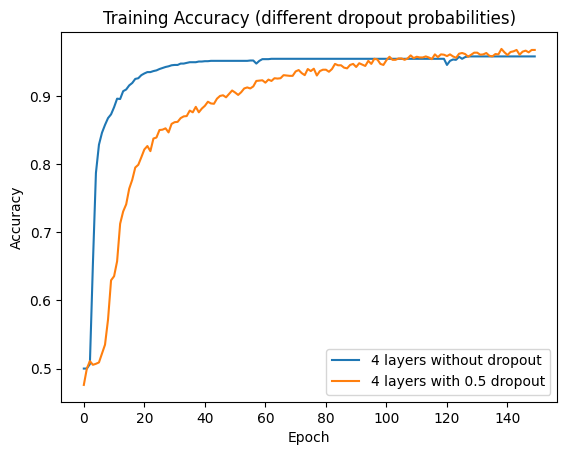

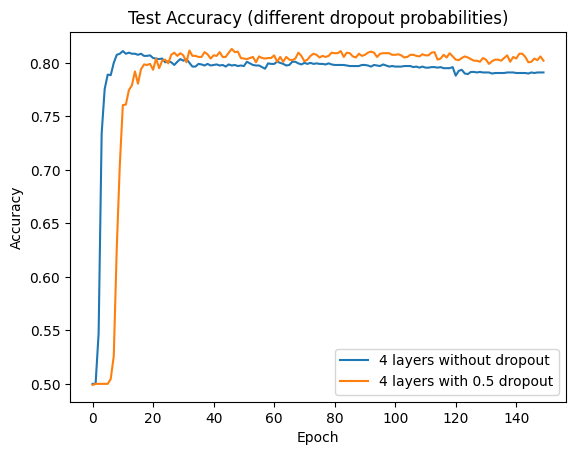

In [24]:
# plot training accuracy
plt.plot(nn4_train_accuracy_no_dropout, label='4 layers without dropout')
plt.plot(nn4_train_accuracy_dropout, label='4 layers with 0.5 dropout')
plt.title('Training Accuracy (different dropout probabilities)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# plot testing accuracy
plt.plot(nn4_test_accuracy_no_dropout, label='4 layers without dropout')
plt.plot(nn4_test_accuracy_dropout, label='4 layers with 0.5 dropout')
plt.title('Test Accuracy (different dropout probabilities)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#### <font color="red">Analysis and discussion here (< 5 sentences) :</font> 
We can observe that the training accuracy of the 4 layer model with and without dropout layers is similar. However, on the test set, the model with dropout performs better than the model without dropout. This represents the ability of dropout to serve as a regularization technique which prevents overfitting. Since the model without dropout had lower testing accuracy than model with dropout, despite having simiar training accuracy, makes it evident that adding a dropout probability of 0.5 helped in preventing overfitting by the model.  

## Question 2.4  (5 points)

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Pick all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.



#### <font color="red">Answer here </font>:
1} Train on a larger dataset.

3} Increase the regularization strength.


#### <font color="red">Explanation (< 5 sentences) here: </font>:
**Training on larger dataset:** A larger dataset can accomodate more variety of data. So training the Neural Network classifier on a larger dataset will allow the model to learn more generalized features of the data. This will help in reducing overfitting on the samples present in the training set, and imporved generalization performance on the unseen data in the test set.

**Increase the regularization strength:** This will penalize large weights in the model which prevents model from giving too much importance to only certain features. Additionally, penalizing large weights assists model in learning a smoother decision boundary between classes which is less susceptible to noise in training data. These will promote the model's ability to generalize well on unseen data and prevent overfitting on training data. Hence, reducing the gap between training and testing accuracy.


# Part 3: Exploration  (20 points)

## Question 3.1 Explore  (20 points)

There are other aspects to optimizing neural network performance. Explore two here, and discuss your findings. You may also try different neural architures here, other than feedforward networks.

In [25]:
### YOUR CODE HERE 

# Cross Entropy Loss

In [26]:
### 4 layers with dropout and cross entropy loss
start_time = time.time()

# train neural networks
print('\n4 layers with dropout and cross entropy loss:')
nn4_train_accuracy_cross_entropy, nn4_test_accuracy_cross_entropy = experiment(NN4(input_size=512, hidden_size=100, dropout_prob=0.5), 
                                                                               use_cross_entropy=True)
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Time to train, eval model: {elapsed_time} seconds")


4 layers with dropout and cross entropy loss:
Epoch #10: 	 train accuracy 0.782	 train loss 0.545	 test accuracy 0.789	 test loss 0.529
Epoch #20: 	 train accuracy 0.875	 train loss 0.446	 test accuracy 0.814	 test loss 0.492
Epoch #30: 	 train accuracy 0.925	 train loss 0.394	 test accuracy 0.811	 test loss 0.493
Epoch #40: 	 train accuracy 0.943	 train loss 0.374	 test accuracy 0.811	 test loss 0.496
Epoch #50: 	 train accuracy 0.962	 train loss 0.354	 test accuracy 0.812	 test loss 0.496
Epoch #60: 	 train accuracy 0.965	 train loss 0.350	 test accuracy 0.806	 test loss 0.499
Epoch #70: 	 train accuracy 0.975	 train loss 0.340	 test accuracy 0.808	 test loss 0.500
Epoch #80: 	 train accuracy 0.975	 train loss 0.338	 test accuracy 0.795	 test loss 0.507
Epoch #90: 	 train accuracy 0.979	 train loss 0.335	 test accuracy 0.807	 test loss 0.500
Epoch #100: 	 train accuracy 0.983	 train loss 0.331	 test accuracy 0.806	 test loss 0.501
Epoch #110: 	 train accuracy 0.981	 train loss 0.332

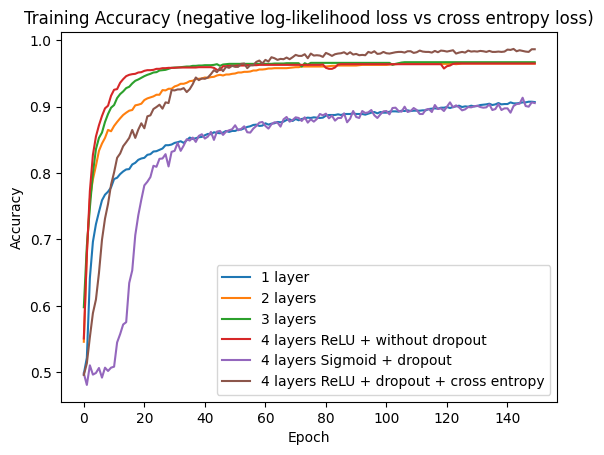

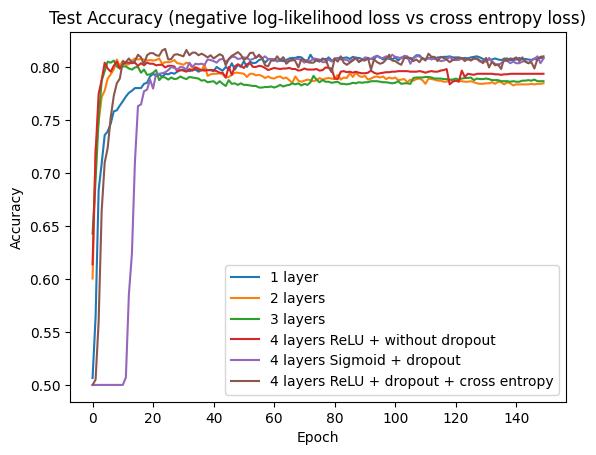

In [27]:
# plot training accuracy
plt.plot(nn1_train_accuracy, label='1 layer')
plt.plot(nn2_train_accuracy, label='2 layers')
plt.plot(nn3_train_accuracy, label='3 layers')
plt.plot(nn4_train_accuracy, label='4 layers ReLU + without dropout')
plt.plot(nn4_train_accuracy_sigmoid_dropout, label='4 layers Sigmoid + dropout')
plt.plot(nn4_train_accuracy_cross_entropy, label='4 layers ReLU + dropout + cross entropy')
plt.title('Training Accuracy (negative log-likelihood loss vs cross entropy loss)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# plot testing accuracy
plt.plot(nn1_test_accuracy, label='1 layer')
plt.plot(nn2_test_accuracy, label='2 layers')
plt.plot(nn3_test_accuracy, label='3 layers')
plt.plot(nn4_test_accuracy, label='4 layers ReLU + without dropout')
plt.plot(nn4_test_accuracy_sigmoid_dropout, label='4 layers Sigmoid + dropout')
plt.plot(nn4_test_accuracy_cross_entropy, label='4 layers ReLU + dropout + cross entropy')
plt.title('Test Accuracy (negative log-likelihood loss vs cross entropy loss)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#### <font color="red">Analysis and discussion :</font> 
The first optimization I attempted was replacing negative log-likelihood loss function with cross-entropy loss function. Cross entropy loss tends to provide better gradients during backpropagation compared to directly using the negative log-likelihood loss. This allows more stable and efficient training of neural networks. 
We can see that the 4 layer model with ReLU activation and dropout which was trained with cross-entropy loss had the highest training accuracy. However, its testing accuracy remained similar to earlier 4 layer models. This represents the overfitting on training data done by this model. Therefore, to prevent overfitting I tried early stopping in the next section.

# 1. Early stopping

In [28]:
### 4 layers with dropout, cross entropy loss and early stopping
start_time = time.time()

# train neural networks
print('\n4 layers with dropout, cross entropy loss and early stopping:')
nn4_train_accuracy_early_stop, nn4_test_accuracy_early_stop = experiment(NN4(input_size=512, hidden_size=100, dropout_prob=0.5), 
                                                                         use_cross_entropy=True, enable_early_stopping=True, patience=50)
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Time to train, eval model: {elapsed_time} seconds")



4 layers with dropout, cross entropy loss and early stopping:
Epoch #10: 	 train accuracy 0.772	 train loss 0.564	 test accuracy 0.775	 test loss 0.548
Epoch #20: 	 train accuracy 0.869	 train loss 0.446	 test accuracy 0.807	 test loss 0.497
Epoch #30: 	 train accuracy 0.916	 train loss 0.402	 test accuracy 0.807	 test loss 0.498
Epoch #40: 	 train accuracy 0.947	 train loss 0.370	 test accuracy 0.805	 test loss 0.502
Epoch #50: 	 train accuracy 0.961	 train loss 0.354	 test accuracy 0.808	 test loss 0.500
Epoch #60: 	 train accuracy 0.972	 train loss 0.342	 test accuracy 0.799	 test loss 0.506
Epoch #70: 	 train accuracy 0.973	 train loss 0.340	 test accuracy 0.801	 test loss 0.504
Epoch #80: 	 train accuracy 0.975	 train loss 0.337	 test accuracy 0.800	 test loss 0.509
Early stopping after 50 epochs without improvement.
Time to train, eval model: 8.915257215499878 seconds


#### <font color="red">Analysis and discussion :</font> 
Early Stopping is a regularization method that stops training when parameter updates no longer yeild improvement on the test set. It prevents overfitting by stopping the training before the model starts to overfit to the training data. This encourages the model to learn more generalizable patterns from the training data. It makes sense to apply early stopping since we only have 2000 samples in the training set and the model tends to overfit the training data at later epochs.

Here, I used the 4 layer model with ReLU activation, dropout and cross-entropy loss. In the experiment function, I implemented code changes that monitor the model's performance on the testing set and stops the training when the test accuracy does not improve for a certain number of epochs. Here we stop after 50 epochs, i.e. best test accuracy was achieved at Epoch #30, we monitored up until Epoch #80 (so 80 didn't printed) and then stopped since further training the model did not produce better test accuracy. But with more training, the training accuracy would have kept improving as the model would have overfitted on the training data.

The model parameters at Epoch #30 that produced the higest test accuracy were also saved, which can be later be loaded as the final model.

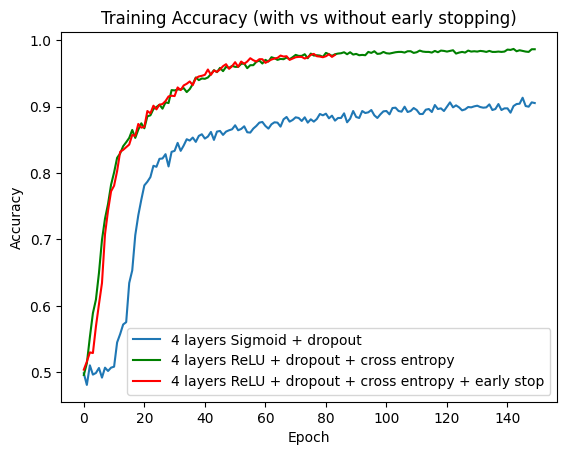

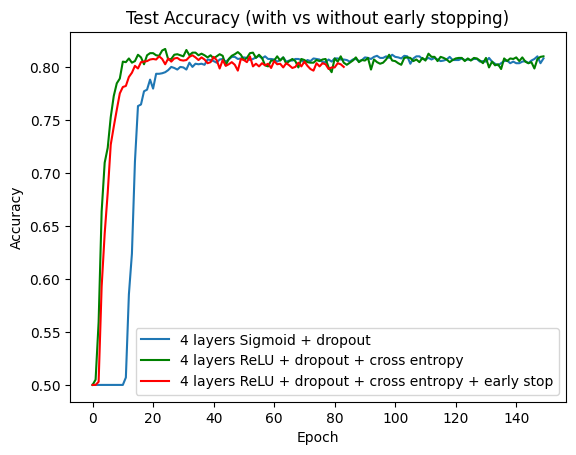

In [44]:
# plot training accuracy
#plt.plot(nn1_train_accuracy, label='1 layer')
#plt.plot(nn2_train_accuracy, label='2 layers')
#plt.plot(nn3_train_accuracy, label='3 layers')
#plt.plot(nn4_train_accuracy, label='4 layers ReLU + without dropout')
plt.plot(nn4_train_accuracy_sigmoid_dropout, label='4 layers Sigmoid + dropout')
plt.plot(nn4_train_accuracy_cross_entropy, label='4 layers ReLU + dropout + cross entropy', c='green')
plt.plot(nn4_train_accuracy_early_stop, label='4 layers ReLU + dropout + cross entropy + early stop', c='r')
plt.title('Training Accuracy (with vs without early stopping)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# plot testing accuracy
#plt.plot(nn1_test_accuracy, label='1 layer')
#plt.plot(nn2_test_accuracy, label='2 layers')
#plt.plot(nn3_test_accuracy, label='3 layers')
#plt.plot(nn4_test_accuracy, label='4 layers ReLU + without dropout')
plt.plot(nn4_test_accuracy_sigmoid_dropout, label='4 layers Sigmoid + dropout')
plt.plot(nn4_test_accuracy_cross_entropy, label='4 layers ReLU + dropout + cross entropy', c='green')
plt.plot(nn4_test_accuracy_early_stop, label='4 layers ReLU + dropout + cross entropy + early stop', c='r')
plt.title('Test Accuracy (with vs without early stopping)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

I plotted the training and test accuracy for 4 layer models with regularization techniques. All these models have similar performance on the test set. But, we can observe that the 4 layer model with relu activation, dropout, cross entropy and early stopping has highest test accuracy, i.e. the best set of parameters, around Epoch #30. 

Now, if we compare the training accuracy and test accuracy graph beyond Epoch #30, the training accuarcy keeps increasing but the test accuracy flattens. This demonstrates that with more training the model just overfits on the training data and doesn't learn to generalize and perform well on the unseen test data. Thus, training for additional epochs is not benefitial and early stopping will prevent overfitting.

# 2. Batch Normalization

In [48]:
class NN4BatchNorm(nn.Module):
    def __init__(self, input_size, hidden_size, activation_function='relu', dropout_prob=0):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.bn2 = nn.BatchNorm1d(hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.bn3 = nn.BatchNorm1d(hidden_size)
        self.fc4 = nn.Linear(hidden_size, 2)
        self.activation = nn.ReLU() if activation_function == 'relu' else nn.Sigmoid()
        self.dropout1 = nn.Dropout(p=dropout_prob)
        self.dropout2 = nn.Dropout(p=dropout_prob)
        self.dropout3 = nn.Dropout(p=dropout_prob)

    def forward(self, x):
        x = self.activation(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = self.activation(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = self.activation(self.bn3(self.fc3(x)))
        x = self.dropout3(x)
        x = self.fc4(x)
        x = F.softmax(x, dim=1)
        return x

In [49]:
### 4 layers without batch normalization
start_time = time.time()

# train neural networks
print('\n4 layers without batch normalization:')
nn4_train_accuracy_batch_norm, nn4_test_accuracy_batch_norm = experiment(NN4BatchNorm(input_size=512, hidden_size=100, dropout_prob=0.5), use_cross_entropy=True)
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Time to train, eval model: {elapsed_time} seconds")


4 layers without batch normalization:
Epoch #10: 	 train accuracy 0.679	 train loss 0.621	 test accuracy 0.698	 test loss 0.619
Epoch #20: 	 train accuracy 0.825	 train loss 0.499	 test accuracy 0.779	 test loss 0.531
Epoch #30: 	 train accuracy 0.866	 train loss 0.452	 test accuracy 0.799	 test loss 0.506
Epoch #40: 	 train accuracy 0.888	 train loss 0.425	 test accuracy 0.802	 test loss 0.503
Epoch #50: 	 train accuracy 0.894	 train loss 0.419	 test accuracy 0.805	 test loss 0.501
Epoch #60: 	 train accuracy 0.899	 train loss 0.412	 test accuracy 0.800	 test loss 0.503
Epoch #70: 	 train accuracy 0.919	 train loss 0.394	 test accuracy 0.797	 test loss 0.508
Epoch #80: 	 train accuracy 0.908	 train loss 0.400	 test accuracy 0.789	 test loss 0.515
Epoch #90: 	 train accuracy 0.927	 train loss 0.383	 test accuracy 0.800	 test loss 0.507
Epoch #100: 	 train accuracy 0.930	 train loss 0.380	 test accuracy 0.794	 test loss 0.511
Epoch #110: 	 train accuracy 0.944	 train loss 0.368	 test a

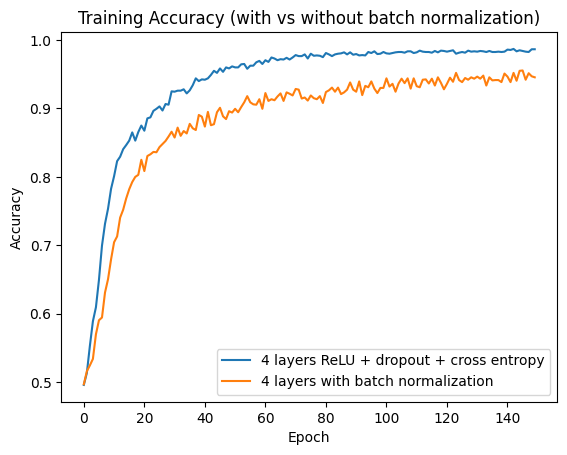

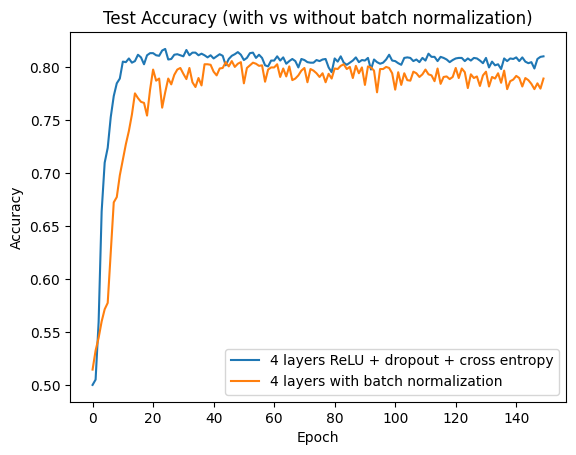

In [50]:
# plot training accuracy
plt.plot(nn4_train_accuracy_cross_entropy, label='4 layers ReLU + dropout + cross entropy')
plt.plot(nn4_train_accuracy_batch_norm, label='4 layers with batch normalization')
plt.title('Training Accuracy (with vs without batch normalization)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# plot testing accuracy
plt.plot(nn4_test_accuracy_cross_entropy, label='4 layers ReLU + dropout + cross entropy')
plt.plot(nn4_test_accuracy_batch_norm, label='4 layers with batch normalization')
plt.title('Test Accuracy (with vs without batch normalization)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#### <font color="red">Analysis and discussion here :</font>
Batch normalization normalizes the activations of each layer during training which ensures inputs to each layer are consistent. It assists the model to learn more generalizable features from the data. Here, I have compared the 4 layer model with ReLU activation, dropout and cross entropy loss, and another version of this model which has batch normalization. 

We can see that the model with batch normalization has lower training accuracy compared to the model without batch normalization. However, both these models have comparable test accuracy, i.e. around 0.79-0.80. The gap between the training and test accuarcy was reduced in the model with batch normalization. Whereas, the model without batch normalization has a larger difference in training and test accuarcy. This demostrates the ability of batch normalization to prevent overfitting on training data.

----------------------------
# <font color="blue"> Submission Instructions</font>
---------------------------

1. Click the Save button at the top of the Jupyter Notebook.
2. Select Cell -> All Output -> Clear. This will clear all the outputs from all cells (but will keep the content of all cells).
2. Select Cell -> Run All. This will run all the cells in order, and will take several minutes.
3. Once you've rerun everything, select File -> Download as -> PDF via LaTeX (If you have trouble using "PDF via LaTex", you can also save the webpage as pdf. <font color='blue'> Make sure all your solutions  are displayed in the pdf</font>, it's okay if the provided codes get cut off because lines are not wrapped in code cells).
4. Look at the PDF file and make sure all your solutions are there, displayed correctly. The PDF is the only thing your graders will see!
5. Submit your PDF on Gradescope.
